In [2]:
# building makemore using a MLP instead of 1-Layer model 

import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt # for making figures 
%matplotlib inline

In [5]:
# read all the words 
words = open('names2.txt', 'r').read().splitlines()
words[:8]

['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia']

In [6]:
len(words)

32033

In [9]:
chars = sorted(list(set(''.join(words))))
stoi = {s: i+1 for i, s in enumerate(chars)}
stoi

{'a': 1,
 'b': 2,
 'c': 3,
 'd': 4,
 'e': 5,
 'f': 6,
 'g': 7,
 'h': 8,
 'i': 9,
 'j': 10,
 'k': 11,
 'l': 12,
 'm': 13,
 'n': 14,
 'o': 15,
 'p': 16,
 'q': 17,
 'r': 18,
 's': 19,
 't': 20,
 'u': 21,
 'v': 22,
 'w': 23,
 'x': 24,
 'y': 25,
 'z': 26}

In [12]:
stoi['.']=0
itos = {i:s for s,i in stoi.items()}
itos

{1: 'a',
 2: 'b',
 3: 'c',
 4: 'd',
 5: 'e',
 6: 'f',
 7: 'g',
 8: 'h',
 9: 'i',
 10: 'j',
 11: 'k',
 12: 'l',
 13: 'm',
 14: 'n',
 15: 'o',
 16: 'p',
 17: 'q',
 18: 'r',
 19: 's',
 20: 't',
 21: 'u',
 22: 'v',
 23: 'w',
 24: 'x',
 25: 'y',
 26: 'z',
 0: '.'}

In [15]:
block_size = 3 # context length: how many characters do we take to predict the next one
X, Y = [], []

for w in words[:5]:
    print(w)
    # we store indexes in context
    context = [0]* block_size # [0,0,0]
    # iterrate word 
    for ch in w + '.' :
        ix = stoi[ch] # ix is the index of the character
        # what is X? 
        X.append(context)
        # Y will be just a list of the indexed characters of the word 
        Y.append(ix)
        print(''.join(itos[i] for i in context), '--->', itos[ix])
        # last element will be overwritten, first element will be deleted 
        context = context[1:] + [ix] # crop and append 
        
X = torch.tensor(X)
Y = torch.tensor(Y)
print(Y)
        

emma
... ---> e
..e ---> m
.em ---> m
emm ---> a
mma ---> .
olivia
... ---> o
..o ---> l
.ol ---> i
oli ---> v
liv ---> i
ivi ---> a
via ---> .
ava
... ---> a
..a ---> v
.av ---> a
ava ---> .
isabella
... ---> i
..i ---> s
.is ---> a
isa ---> b
sab ---> e
abe ---> l
bel ---> l
ell ---> a
lla ---> .
sophia
... ---> s
..s ---> o
.so ---> p
sop ---> h
oph ---> i
phi ---> a
hia ---> .
tensor([ 5, 13, 13,  1,  0, 15, 12,  9, 22,  9,  1,  0,  1, 22,  1,  0,  9, 19,
         1,  2,  5, 12, 12,  1,  0, 19, 15, 16,  8,  9,  1,  0])


In [16]:
# in the paper 'A Neural Probabilistic Language Model' they created a 30-dimensional space to put the 17000 different words (as vectors)
# we want to try a 2-dimensional space at first 

# this is is about embeddings as well 
# we create the lookup table
# 27 because a-z + '.'

C = torch.rand((27,2))
C


tensor([[0.8649, 0.2357],
        [0.1222, 0.7879],
        [0.8506, 0.7948],
        [0.7638, 0.5017],
        [0.6542, 0.3321],
        [0.3134, 0.0244],
        [0.7317, 0.6597],
        [0.2916, 0.7086],
        [0.0824, 0.6877],
        [0.7477, 0.8930],
        [0.1717, 0.5032],
        [0.6044, 0.5113],
        [0.7256, 0.2706],
        [0.3471, 0.7196],
        [0.7601, 0.6858],
        [0.7119, 0.2310],
        [0.1827, 0.1037],
        [0.0796, 0.7576],
        [0.0997, 0.9905],
        [0.2882, 0.1598],
        [0.3102, 0.4589],
        [0.6329, 0.1932],
        [0.7781, 0.1111],
        [0.5344, 0.6284],
        [0.8485, 0.9179],
        [0.1810, 0.2149],
        [0.4990, 0.6991]])

In [17]:
C[5]

tensor([0.3134, 0.0244])

In [30]:
# we need to cast to float because one_hot creates integers and python does not know how to multiply intergers and floats (we have float in the tensor)
P = F.one_hot(torch.tensor(5), num_classes=27).float()
P

tensor([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [27]:
# 27x1
P.shape

torch.Size([27])

In [28]:
# matrix multiplication 1x27 @ 27x2 = 
D = P @ C
D.shape

torch.Size([2])

In [29]:
# output is identical to C[5]
# because w somehow picked (matrix mul rules) the 5th row with the help of the one_hot encoded 5 
D

tensor([0.3134, 0.0244])

In [31]:
# so embedding meens we create a vector from our input into a n-dimensional space 

In [32]:
# we'll use the simple index method C[5] instead one_hot because it's faster here 
# that means we use embedding tables 

# in Python I can take a list or even a matrix (or tensor) to index 
C[5]

tensor([0.3134, 0.0244])

In [33]:
X

tensor([[ 0,  0,  0],
        [ 0,  0,  5],
        [ 0,  5, 13],
        [ 5, 13, 13],
        [13, 13,  1],
        [ 0,  0,  0],
        [ 0,  0, 15],
        [ 0, 15, 12],
        [15, 12,  9],
        [12,  9, 22],
        [ 9, 22,  9],
        [22,  9,  1],
        [ 0,  0,  0],
        [ 0,  0,  1],
        [ 0,  1, 22],
        [ 1, 22,  1],
        [ 0,  0,  0],
        [ 0,  0,  9],
        [ 0,  9, 19],
        [ 9, 19,  1],
        [19,  1,  2],
        [ 1,  2,  5],
        [ 2,  5, 12],
        [ 5, 12, 12],
        [12, 12,  1],
        [ 0,  0,  0],
        [ 0,  0, 19],
        [ 0, 19, 15],
        [19, 15, 16],
        [15, 16,  8],
        [16,  8,  9],
        [ 8,  9,  1]])

In [36]:
# first element is 3x C[0]
print(C[0])
print(C[X])

tensor([0.8649, 0.2357])
tensor([[[0.8649, 0.2357],
         [0.8649, 0.2357],
         [0.8649, 0.2357]],

        [[0.8649, 0.2357],
         [0.8649, 0.2357],
         [0.3134, 0.0244]],

        [[0.8649, 0.2357],
         [0.3134, 0.0244],
         [0.3471, 0.7196]],

        [[0.3134, 0.0244],
         [0.3471, 0.7196],
         [0.3471, 0.7196]],

        [[0.3471, 0.7196],
         [0.3471, 0.7196],
         [0.1222, 0.7879]],

        [[0.8649, 0.2357],
         [0.8649, 0.2357],
         [0.8649, 0.2357]],

        [[0.8649, 0.2357],
         [0.8649, 0.2357],
         [0.7119, 0.2310]],

        [[0.8649, 0.2357],
         [0.7119, 0.2310],
         [0.7256, 0.2706]],

        [[0.7119, 0.2310],
         [0.7256, 0.2706],
         [0.7477, 0.8930]],

        [[0.7256, 0.2706],
         [0.7477, 0.8930],
         [0.7781, 0.1111]],

        [[0.7477, 0.8930],
         [0.7781, 0.1111],
         [0.7477, 0.8930]],

        [[0.7781, 0.1111],
         [0.7477, 0.8930],
        

In [37]:
C[X].shape

torch.Size([32, 3, 2])

In [38]:
# indexing in Python is awesome !!!
# we have our embedding (the embedding is 3-dimensional and we have two of them: torch.Size([32, 3, 2]))
emb = C[X]
emb.shape 

torch.Size([32, 3, 2])

In [39]:
# now let's create the hidden layer (tanh)
# inputs ? 6 because 3*2  (the embedding is 3-dimensional and we have two of them: torch.Size([32, 3, 2]))
# number of neurons is a paramter, we use 100 for example, can be changed with respect to optimazation 
W1= torch.randn((6, 100))
# per neurone we need a bias, so we create 100 biases  
b1= torch.randn(100)

In [40]:
# we would like to do this emb @ W1 +1 but this won't work because of the strange shape of emb torch.Size([32, 3, 2])

In [72]:
# W1 is W1= torch.randn((6, 100))
# how to transform those two? (6,100) vs. (32,3,2)
emb

tensor([[[0.8649, 0.2357],
         [0.8649, 0.2357],
         [0.8649, 0.2357]],

        [[0.8649, 0.2357],
         [0.8649, 0.2357],
         [0.3134, 0.0244]],

        [[0.8649, 0.2357],
         [0.3134, 0.0244],
         [0.3471, 0.7196]],

        [[0.3134, 0.0244],
         [0.3471, 0.7196],
         [0.3471, 0.7196]],

        [[0.3471, 0.7196],
         [0.3471, 0.7196],
         [0.1222, 0.7879]],

        [[0.8649, 0.2357],
         [0.8649, 0.2357],
         [0.8649, 0.2357]],

        [[0.8649, 0.2357],
         [0.8649, 0.2357],
         [0.7119, 0.2310]],

        [[0.8649, 0.2357],
         [0.7119, 0.2310],
         [0.7256, 0.2706]],

        [[0.7119, 0.2310],
         [0.7256, 0.2706],
         [0.7477, 0.8930]],

        [[0.7256, 0.2706],
         [0.7477, 0.8930],
         [0.7781, 0.1111]],

        [[0.7477, 0.8930],
         [0.7781, 0.1111],
         [0.7477, 0.8930]],

        [[0.7781, 0.1111],
         [0.7477, 0.8930],
         [0.1222, 0.7879]],

    

In [51]:
# this is the notation to print the first element x (x,y) of the 1th element x (x,y,z) of the first three elemets
emb[:3,0,:1]

tensor([[0.8649],
        [0.8649],
        [0.8649]])

In [63]:
# this is the notation to print the first element x (x,y) of the 1th element x (x,y,z) of the first three elemets
print(emb[:3,0,:]) 
print(emb[:3,0,:].shape) 
print(emb[:3,1,:])
print(emb[:3,2,:])

tensor([[0.8649, 0.2357],
        [0.8649, 0.2357],
        [0.8649, 0.2357]])
torch.Size([3, 2])
tensor([[0.8649, 0.2357],
        [0.8649, 0.2357],
        [0.3134, 0.0244]])
tensor([[0.8649, 0.2357],
        [0.3134, 0.0244],
        [0.3471, 0.7196]])


In [64]:
# I can concatenate matrices with torch.cat() like if have A and B torch.cat((A,B), 1) would concatenate on the 1st dimension 
x = torch.rand((3,2))
y = torch.rand((3,2))
torch.cat((x,y), 0)

tensor([[0.0847, 0.4366],
        [0.1391, 0.7879],
        [0.9622, 0.8322],
        [0.4571, 0.6055],
        [0.0289, 0.3253],
        [0.2428, 0.8866]])

In [65]:
x = torch.rand((3,2))
y = torch.rand((3,2))
torch.cat((x,y), 1)

tensor([[0.3733, 0.8880, 0.5501, 0.1263],
        [0.1847, 0.7454, 0.2172, 0.9796],
        [0.3759, 0.6127, 0.5508, 0.8423]])

In [67]:
torch.cat([emb[:, 0, :], emb[:, 1, :], emb[:, 2, :]], 1)

tensor([[0.8649, 0.2357, 0.8649, 0.2357, 0.8649, 0.2357],
        [0.8649, 0.2357, 0.8649, 0.2357, 0.3134, 0.0244],
        [0.8649, 0.2357, 0.3134, 0.0244, 0.3471, 0.7196],
        [0.3134, 0.0244, 0.3471, 0.7196, 0.3471, 0.7196],
        [0.3471, 0.7196, 0.3471, 0.7196, 0.1222, 0.7879],
        [0.8649, 0.2357, 0.8649, 0.2357, 0.8649, 0.2357],
        [0.8649, 0.2357, 0.8649, 0.2357, 0.7119, 0.2310],
        [0.8649, 0.2357, 0.7119, 0.2310, 0.7256, 0.2706],
        [0.7119, 0.2310, 0.7256, 0.2706, 0.7477, 0.8930],
        [0.7256, 0.2706, 0.7477, 0.8930, 0.7781, 0.1111],
        [0.7477, 0.8930, 0.7781, 0.1111, 0.7477, 0.8930],
        [0.7781, 0.1111, 0.7477, 0.8930, 0.1222, 0.7879],
        [0.8649, 0.2357, 0.8649, 0.2357, 0.8649, 0.2357],
        [0.8649, 0.2357, 0.8649, 0.2357, 0.1222, 0.7879],
        [0.8649, 0.2357, 0.1222, 0.7879, 0.7781, 0.1111],
        [0.1222, 0.7879, 0.7781, 0.1111, 0.1222, 0.7879],
        [0.8649, 0.2357, 0.8649, 0.2357, 0.8649, 0.2357],
        [0.864

In [68]:
torch.cat([emb[:, 0, :], emb[:, 1, :], emb[:, 2, :]], 1).shape

torch.Size([32, 6])

In [71]:
# this is all the elemems of the first column and all the elements of the second column 
torch.unbind(emb, 2)

(tensor([[0.8649, 0.8649, 0.8649],
         [0.8649, 0.8649, 0.3134],
         [0.8649, 0.3134, 0.3471],
         [0.3134, 0.3471, 0.3471],
         [0.3471, 0.3471, 0.1222],
         [0.8649, 0.8649, 0.8649],
         [0.8649, 0.8649, 0.7119],
         [0.8649, 0.7119, 0.7256],
         [0.7119, 0.7256, 0.7477],
         [0.7256, 0.7477, 0.7781],
         [0.7477, 0.7781, 0.7477],
         [0.7781, 0.7477, 0.1222],
         [0.8649, 0.8649, 0.8649],
         [0.8649, 0.8649, 0.1222],
         [0.8649, 0.1222, 0.7781],
         [0.1222, 0.7781, 0.1222],
         [0.8649, 0.8649, 0.8649],
         [0.8649, 0.8649, 0.7477],
         [0.8649, 0.7477, 0.2882],
         [0.7477, 0.2882, 0.1222],
         [0.2882, 0.1222, 0.8506],
         [0.1222, 0.8506, 0.3134],
         [0.8506, 0.3134, 0.7256],
         [0.3134, 0.7256, 0.7256],
         [0.7256, 0.7256, 0.1222],
         [0.8649, 0.8649, 0.8649],
         [0.8649, 0.8649, 0.2882],
         [0.8649, 0.2882, 0.7119],
         [0.2882, 0.

In [73]:
# this returns each element as a tensor
torch.unbind(emb, 0)

(tensor([[0.8649, 0.2357],
         [0.8649, 0.2357],
         [0.8649, 0.2357]]),
 tensor([[0.8649, 0.2357],
         [0.8649, 0.2357],
         [0.3134, 0.0244]]),
 tensor([[0.8649, 0.2357],
         [0.3134, 0.0244],
         [0.3471, 0.7196]]),
 tensor([[0.3134, 0.0244],
         [0.3471, 0.7196],
         [0.3471, 0.7196]]),
 tensor([[0.3471, 0.7196],
         [0.3471, 0.7196],
         [0.1222, 0.7879]]),
 tensor([[0.8649, 0.2357],
         [0.8649, 0.2357],
         [0.8649, 0.2357]]),
 tensor([[0.8649, 0.2357],
         [0.8649, 0.2357],
         [0.7119, 0.2310]]),
 tensor([[0.8649, 0.2357],
         [0.7119, 0.2310],
         [0.7256, 0.2706]]),
 tensor([[0.7119, 0.2310],
         [0.7256, 0.2706],
         [0.7477, 0.8930]]),
 tensor([[0.7256, 0.2706],
         [0.7477, 0.8930],
         [0.7781, 0.1111]]),
 tensor([[0.7477, 0.8930],
         [0.7781, 0.1111],
         [0.7477, 0.8930]]),
 tensor([[0.7781, 0.1111],
         [0.7477, 0.8930],
         [0.1222, 0.7879]]),
 ten

In [74]:
# this is what we want
torch.unbind(emb, 1)

(tensor([[0.8649, 0.2357],
         [0.8649, 0.2357],
         [0.8649, 0.2357],
         [0.3134, 0.0244],
         [0.3471, 0.7196],
         [0.8649, 0.2357],
         [0.8649, 0.2357],
         [0.8649, 0.2357],
         [0.7119, 0.2310],
         [0.7256, 0.2706],
         [0.7477, 0.8930],
         [0.7781, 0.1111],
         [0.8649, 0.2357],
         [0.8649, 0.2357],
         [0.8649, 0.2357],
         [0.1222, 0.7879],
         [0.8649, 0.2357],
         [0.8649, 0.2357],
         [0.8649, 0.2357],
         [0.7477, 0.8930],
         [0.2882, 0.1598],
         [0.1222, 0.7879],
         [0.8506, 0.7948],
         [0.3134, 0.0244],
         [0.7256, 0.2706],
         [0.8649, 0.2357],
         [0.8649, 0.2357],
         [0.8649, 0.2357],
         [0.2882, 0.1598],
         [0.7119, 0.2310],
         [0.1827, 0.1037],
         [0.0824, 0.6877]]),
 tensor([[0.8649, 0.2357],
         [0.8649, 0.2357],
         [0.3134, 0.0244],
         [0.3471, 0.7196],
         [0.3471, 0.7196],

In [75]:
# this is what we want and equivalent to torch.cat([emb[:, 0, :], emb[:, 1, :], emb[:, 2, :]], 1)
# this format is more flexible because this works with any block size 
torch.cat(torch.unbind(emb, 1), 1)

tensor([[0.8649, 0.2357, 0.8649, 0.2357, 0.8649, 0.2357],
        [0.8649, 0.2357, 0.8649, 0.2357, 0.3134, 0.0244],
        [0.8649, 0.2357, 0.3134, 0.0244, 0.3471, 0.7196],
        [0.3134, 0.0244, 0.3471, 0.7196, 0.3471, 0.7196],
        [0.3471, 0.7196, 0.3471, 0.7196, 0.1222, 0.7879],
        [0.8649, 0.2357, 0.8649, 0.2357, 0.8649, 0.2357],
        [0.8649, 0.2357, 0.8649, 0.2357, 0.7119, 0.2310],
        [0.8649, 0.2357, 0.7119, 0.2310, 0.7256, 0.2706],
        [0.7119, 0.2310, 0.7256, 0.2706, 0.7477, 0.8930],
        [0.7256, 0.2706, 0.7477, 0.8930, 0.7781, 0.1111],
        [0.7477, 0.8930, 0.7781, 0.1111, 0.7477, 0.8930],
        [0.7781, 0.1111, 0.7477, 0.8930, 0.1222, 0.7879],
        [0.8649, 0.2357, 0.8649, 0.2357, 0.8649, 0.2357],
        [0.8649, 0.2357, 0.8649, 0.2357, 0.1222, 0.7879],
        [0.8649, 0.2357, 0.1222, 0.7879, 0.7781, 0.1111],
        [0.1222, 0.7879, 0.7781, 0.1111, 0.1222, 0.7879],
        [0.8649, 0.2357, 0.8649, 0.2357, 0.8649, 0.2357],
        [0.864

In [77]:
# the 3rd solution to the problem (most efficient one!!)
a = torch.arange(18)
a

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17])

In [78]:
a.shape

torch.Size([18])

In [80]:
# lol we can simply create a view like in sql 
a.view(2,9)

tensor([[ 0,  1,  2,  3,  4,  5,  6,  7,  8],
        [ 9, 10, 11, 12, 13, 14, 15, 16, 17]])

In [82]:
a.view(3, 3, 2)  #3*2= 6 und 6*3=18

tensor([[[ 0,  1],
         [ 2,  3],
         [ 4,  5]],

        [[ 6,  7],
         [ 8,  9],
         [10, 11]],

        [[12, 13],
         [14, 15],
         [16, 17]]])

In [84]:
# view works because of the underlying storange (this is how it is stored in the computer memory: in a 1-dimensional vector)
# .view won#t modifiy the memory it just modifies the output view
a.storage()

/var/folders/dp/lm90kt857xz9dwmr6djg3g2m0000gn/T/ipykernel_19014/954912931.py:2: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  a.storage()


 0
 1
 2
 3
 4
 5
 6
 7
 8
 9
 10
 11
 12
 13
 14
 15
 16
 17
[torch.storage.TypedStorage(dtype=torch.int64, device=cpu) of size 18]

In [85]:
# it works! :)
emb.view(32,6) == torch.cat(torch.unbind(emb, 1), 1)

tensor([[True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, T

In [87]:
# now let's create the hidden layer (tanh)
# inputs ? 6 because 3*2  (the embedding is 3-dimensional and we have two of them: torch.Size([32, 3, 2]))
# number of neurons is a paramter, we use 100 for example, can be changed with respect to optimazation 
W1= torch.randn((6, 100))
# per neurone we need a bias, so we create 100 biases  
b1= torch.randn(100)

# emb.shape[0] returns number of examples , we could write "-1" as well but this is bad style from my pov
h = emb.view(emb.shape[0],6) @W1 +b1
# 32x100
h.shape

torch.Size([32, 100])

In [91]:
# to get our hidden layer tanh
h = torch.tanh(h)
h.shape

torch.Size([32, 100])

In [90]:
# let's create the final layer 
# we need 100 inputs because we had 100 Neurons in the tanh layer 
# we need 27 output neorons because we have 27 characters 
# we create 27 neurons with 100 inputs each + 27 biases for each neurone

W2 = torch.randn((100,27))
b2 = torch.randn(27)
W2.shape

torch.Size([100, 27])

In [92]:
logits  = h @ W2 +b2

In [93]:
logits.shape

torch.Size([32, 27])

In [94]:
counts = logits.exp()

In [95]:
prob = counts /counts.sum(1, keepdims=True)


In [98]:
# works, we calculated to avg with respect to each row 
prob[0].sum()

tensor(1.)

In [99]:
# 32 is the number of samples, for w in words[:5]:
prob.shape

torch.Size([32, 27])

In [100]:
# predicting the output character with respect to our box size 
Y

tensor([ 5, 13, 13,  1,  0, 15, 12,  9, 22,  9,  1,  0,  1, 22,  1,  0,  9, 19,
         1,  2,  5, 12, 12,  1,  0, 19, 15, 16,  8,  9,  1,  0])

In [101]:
# Y[0] = 5 means : after the '.' or in this case '...' we want the model to predict an 'e'

In [102]:
torch.arange(prob.shape[0])

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

In [105]:
prob[torch.arange(prob.shape[0]), Y]

tensor([2.6595e-13, 6.9229e-08, 1.1820e-06, 2.5063e-12, 3.9058e-08, 2.5447e-08,
        1.0351e-04, 1.5133e-12, 1.7652e-07, 6.4469e-12, 1.8944e-09, 4.2735e-06,
        3.6088e-12, 8.3895e-10, 4.2812e-12, 3.3506e-07, 6.5100e-13, 2.8303e-06,
        2.2021e-12, 1.7558e-05, 1.4661e-09, 2.8783e-09, 3.5280e-03, 1.1823e-09,
        6.5522e-06, 6.3687e-10, 1.4123e-07, 2.6671e-02, 2.7602e-08, 4.0452e-11,
        8.2256e-11, 9.1129e-09])

In [106]:
loss = -prob[torch.arange(prob.shape[0]), Y].log().mean()

In [107]:
loss

tensor(18.7266)

In [108]:
# ------------ now made respectable :) ---------------

In [109]:
X.shape, Y.shape # dataset

(torch.Size([32, 3]), torch.Size([32]))

In [155]:
# forward pass
g = torch.Generator().manual_seed(2147483647) #for reproducebility
C = torch.randn((27, 2), generator=g) # mapping of characters into 2-dimensional vector space 
W1 = torch.randn((6, 100), generator=g) # tanh layer 
b1 = torch.randn(100, generator=g)
W2 = torch.randn((100, 27), generator=g) # output layer
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

In [156]:
sum(p.nelement() for p in parameters)

3481

In [157]:
b1.nelement()

100

In [158]:
emb = C[X] # [32,3,2]
h = torch.tanh(emb.view(X.shape[0], 6) @ W1+b1) # (X.shape[0], 100)
logits = h @ W2 + b2 # (32, 27)
counts = logits.exp()
prob = counts /counts.sum(1, keepdims=True)
loss = -prob[torch.arange(prob.shape[0]), Y].log().mean()
loss

tensor(17.7697)

In [ ]:
# instead of calculating the loss manually there is a function in pytorch to do this 

In [161]:
# this is the same loss , What we do here is classsification... besides that what else can we do?
F.cross_entropy(logits, Y)

tensor(17.7697)

In [168]:
# example do describe why this function F.cross_entropy(logits, Y) is more efficient 
# for a very positve number we run out of range in our floating point number and get an "inf" 

logitss = torch.tensor([-200, -3, 0, 100]) 
countss = logitss.exp()
probss = countss / counts.sum()
probss

tensor([0.0000e+00, 2.7827e-14, 5.5892e-13,        inf])

In [177]:
# the offset of -50 won't change the probabilities 
# in case there is a high number we subtract it as offset but the tensor values will stay consitent 
# F.cross_entropy(logits, Y) function will do stuff like this internally, that is why we should use it 
# forward pass and backward pass are more efficient 

logitss = torch.tensor([-5, -3, 0, 5]) -50
countss = logitss.exp()
probss = countss / countss.sum()
probss

tensor([4.5079e-05, 3.3309e-04, 6.6903e-03, 9.9293e-01])

In [249]:
block_size = 3 # context length: how many characters do we take to predict the next one
X, Y = [], []


# our first attempt was pretty slow with all the examples, so we need something that is called batching 
for w in words:
    #print(w)
    # we store indexes in context
    context = [0]* block_size # [0,0,0]
    # iterrate word 
    for ch in w + '.' :
        ix = stoi[ch] # ix is the index of the character
        # what is X? 
        X.append(context)
        # Y will be just a list of the indexed characters of the word 
        Y.append(ix)
        #print(''.join(itos[i] for i in context), '--->', itos[ix])
        # last element will be overwritten, first element will be deleted 
        context = context[1:] + [ix] # crop and append 
        
X = torch.tensor(X)
Y = torch.tensor(Y)
print(Y.shape, X.shape)


torch.Size([228146]) torch.Size([228146, 3])


In [293]:
# forward pass
g = torch.Generator().manual_seed(2147483647) #for reproducebility
C = torch.randn((27, 2), generator=g) # mapping of characters into 2-dimensional vector space 
W1 = torch.randn((6, 100), generator=g) # tanh layer 
b1 = torch.randn(100, generator=g)
W2 = torch.randn((100, 27), generator=g) # output layer
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

In [294]:
sum(p.nelement() for p in parameters)

3481

In [295]:
# we forgot to set that we want gradients 
for p in parameters:
    p.requires_grad = True

In [296]:
# we want to optimize the learning rate 
# torch.linespace(min, max, steps)
# we want to step linieary to the exponents 
lre = torch.linspace(-3, 0, 1000)
lrs = 10**lre
# those are the candidates we want to search over 
lrs[:10]

tensor([0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0011,
        0.0011])

In [299]:
lri = []
lree  = []
lossi = []

# let's write it again with all the new knowledge
for i in range(10000):
    # minibatch contruct 
    # our minibatch size is 32
    ix = torch.randint(0 , X.shape[0], (32,))
    X = X[ix]
    
    # forward pass
    emb = C[X] # [32,3,2]
    h = torch.tanh(emb.view(X.shape[0], 6) @ W1+b1) # (X.shape[0], 100)
    logits = h @ W2 + b2 # (32, 27)
    
    # because of the minibatch we have to index Y with ix as well
    loss = F.cross_entropy(logits, Y[ix])     
    #print("loss: ", loss.item())
    
    # backward pass 
    
    # parameters = [C, W1, b1, W2, b2]
    # reset gradients 
    for p in parameters:
        p.grad = None 
    loss.backward()
    
    # we use the new learnings rate candidates 
    # lr = lrs[i]
    # update parameters 
    # we use 0.1 because stats say it's the best learning rate 
    for p in parameters: 
        p.data += -0.1*p.grad
    
    # stats
    #lri.append(lr)
    #lree.append(lre[i])
    #lossi.append(loss.item())
        
# prints only the loss for the minibatch         
print("minibatch loss: ", loss.item())



minibatch loss:  2.2205193042755127


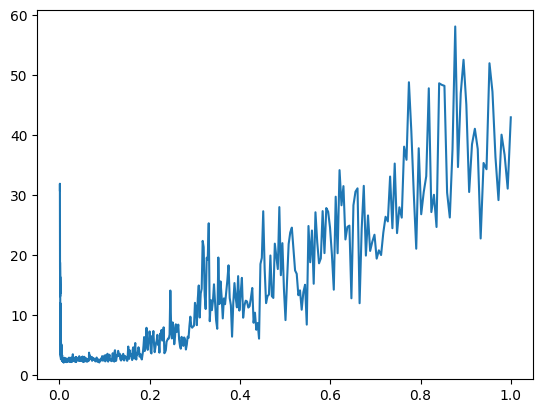

In [284]:
# seems 0.1 would be a good learning rate because its quite stable 
plt.plot(lri, lossi)

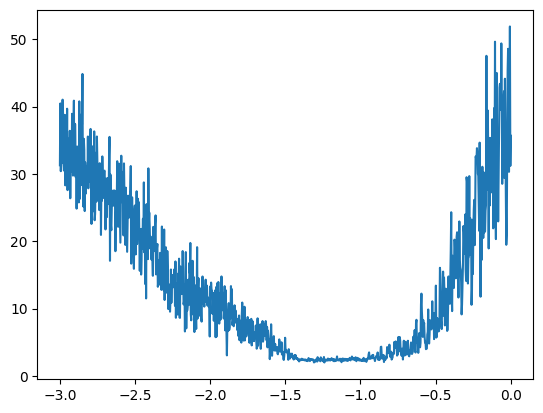

In [292]:
plt.plot(lree, lossi)

In [245]:
# first dimension, this returs as well the predicted character index 
logits.max(1)

torch.return_types.max(
values=tensor([5.4145, 5.4145, 5.4145, 5.4145, 5.4145, 5.4145, 5.4145, 5.4145, 5.4145,
        5.4145, 5.4145, 5.4145, 5.4145, 5.4145, 5.4145, 5.4145, 5.4145, 5.4145,
        5.4145, 5.4145, 5.4145, 5.4145, 5.4145, 5.4145, 5.4145, 5.4145, 5.4145,
        5.4145, 5.4145, 5.4145, 5.4145, 5.4145], grad_fn=<MaxBackward0>),
indices=tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0]))

In [246]:
Y

tensor([ 5, 13, 13,  ..., 26, 24,  0])

In [247]:
# now we want to implement batching, because it's inefficient to train on the whole data set at once 
# we create mini batches and forward and backward pass them 
# (int low, int high, tuple of ints size, *, Tensor out, torch.dtype dtype, torch.layout layout, torch.device device, bool pin_memory, bool requires_grad)
print(X.shape[0])

# our mini batch size is 32
torch.randint(0 , X.shape[0], (32,))

32


tensor([17,  9, 12,  9,  6, 16, 17, 18, 12,  7,  7, 31, 14, 18,  9,  7, 17,  7,
        26, 23, 20,  0, 21, 16, 17, 16, 21, 22,  5, 28,  7, 22])

In [248]:
X.shape

torch.Size([32, 3])

In [301]:
# print loss of the model 

emb = C[X] # [32,3,2]
h = torch.tanh(emb.view(X.shape[0], 6) @ W1+b1) # (X.shape[0], 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Y[ix])
loss.item()

2.125157117843628

In [315]:
# how to split your data (training split, dev/validation split, test split)
# for training the hyper parameters: dev/validation split

# build the dataset
block_size = 3 # context length: how many characters do we take to predict the next one?

def build_dataset(words):  
  X, Y = [], []
  for w in words:

    #print(w)
    context = [0] * block_size
    for ch in w + '.':
      ix = stoi[ch]
      X.append(context)
      Y.append(ix)
      #print(''.join(itos[i] for i in context), '--->', itos[ix])
      context = context[1:] + [ix] # crop and append

  X = torch.tensor(X)
  Y = torch.tensor(Y)
  print(X.shape, Y.shape)
  return X, Y

import random
random.seed(42)
random.shuffle(words)
n1 = int(0.8*len(words))
n2 = int(0.9*len(words))

# training set
Xtr, Ytr = build_dataset(words[:n1])

# dev set
Xdev, Ydev = build_dataset(words[n1:n2])

#test set
Xte, Yte = build_dataset(words[n2:])

torch.Size([182437, 3]) torch.Size([182437])
torch.Size([22781, 3]) torch.Size([22781])
torch.Size([22928, 3]) torch.Size([22928])


In [316]:
Xtr.shape, Ytr.shape # dataset

(torch.Size([182437, 3]), torch.Size([182437]))

In [364]:
g = torch.Generator().manual_seed(2147483647) # for reproducibility
C = torch.randn((27, 10), generator=g)
W1 = torch.randn((30, 200), generator=g)
b1 = torch.randn(200, generator=g)
W2 = torch.randn((200, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

In [365]:
sum(p.nelement() for p in parameters) # number of parameters in total

11897

In [366]:
for p in parameters:
    p.requires_grad = True

In [367]:
lri = []
lossi = []
stepi = []


In [384]:

for i in range(50000):
  
    # minibatch construct
    ix = torch.randint(0, Xtr.shape[0], (32,))
  
    # forward pass
    emb = C[Xtr[ix]] # (32, 3, 10)
    h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # (32, 200)
    logits = h @ W2 + b2 # (32, 27)
    loss = F.cross_entropy(logits, Ytr[ix])
    #print(loss.item())
  
    # backward pass
    for p in parameters:
        p.grad = None
    loss.backward()
  
  # update
  #lr = lrs[i]
    lr = 0.1 if i < 100000 else 0.01
    for p in parameters:
        p.data += -lr * p.grad

    # track stats
    #lri.append(lre[i])
    stepi.append(i)
    # looks nicer with log10
    lossi.append(loss.log10().item())

#print(loss.item())

In [385]:
print(loss.item())

2.244377374649048


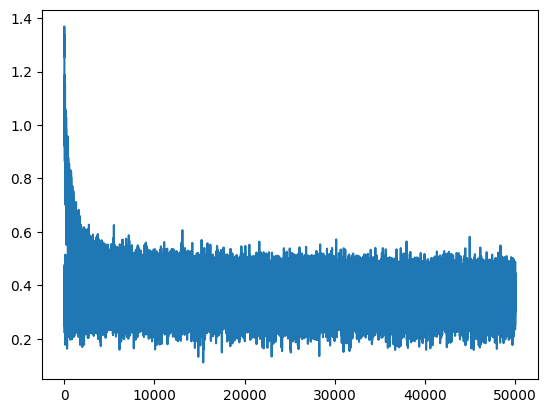

In [386]:
plt.plot(stepi, lossi)

In [387]:
# evaluate the loss with the training set 
emb = C[Xtr] # (32, 3, 2)
h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Ytr)
loss

tensor(2.2592, grad_fn=<NllLossBackward0>)

In [388]:
# if dev loss and training loss is almost equal we are not overfitting 
# evaluate the loss with the dev set
emb = C[Xdev] # (32, 3, 2)
h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Ydev)
loss

tensor(2.3221, grad_fn=<NllLossBackward0>)

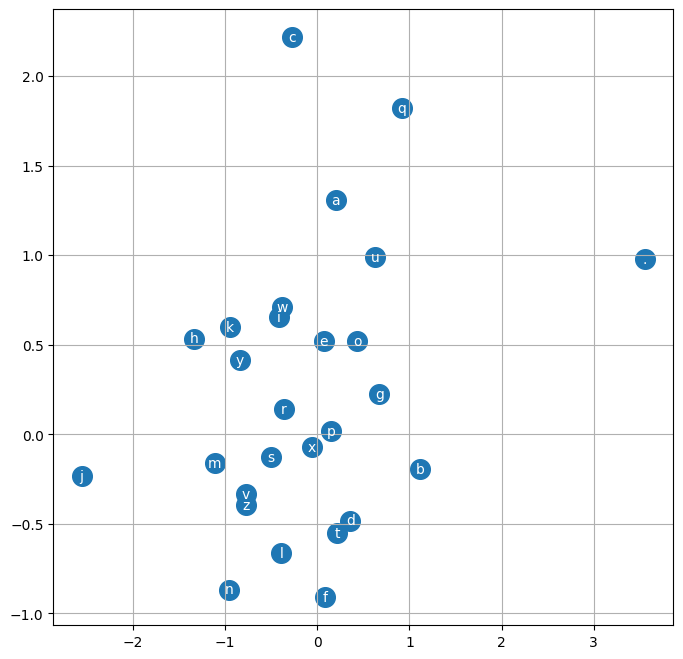

In [389]:
# visualize dimensions 0 and 1 of the embedding matrix C for all characters
plt.figure(figsize=(8,8))
plt.scatter(C[:,0].data, C[:,1].data, s=200)
for i in range(C.shape[0]):
    plt.text(C[i,0].item(), C[i,1].item(), itos[i], ha="center", va="center", color='white')
plt.grid('minor')

In [390]:
context = [0] * block_size
C[torch.tensor([context])].shape

torch.Size([1, 3, 10])

In [391]:
# sample from the model
g = torch.Generator().manual_seed(2147483647 + 10)

for _ in range(20):
    
    out = []
    context = [0] * block_size # initialize with all ...
    while True:
      emb = C[torch.tensor([context])] # (1,block_size,d)
      h = torch.tanh(emb.view(1, -1) @ W1 + b1)
      logits = h @ W2 + b2
      probs = F.softmax(logits, dim=1)
      ix = torch.multinomial(probs, num_samples=1, generator=g).item()
      context = context[1:] + [ix]
      out.append(ix)
      if ix == 0:
        break
    
    print(''.join(itos[i] for i in out))

carmaheamillia.
fishippielly.
salaysa.
jazonton.
pesynci.
aquia.
ramaritziaiir.
jane.
jah.
amya.
casesian.
salisea.
jazia.
wanella.
jarisika.
jessirra.
jes.
eziia.
kaley.
jareah.
